# Hands on exercise with disease data

Here we are going to explore some real data set. The data comes from [Project Tycho](https://www.tycho.pitt.edu/data/), a huge database with disease data. 

To get started, first we need to import the libraries we are going to use:

In [1]:
#load libraries
import pandas as pd
import numpy as np

Now we are going to **load the data**. 

The data is presented here in form of a csv file. We could write a csv parser and so but it will be tedious, prone to bugs, and slow. Instead we are going the use `pandas.read_csv` function!

In [2]:
# loading Dengue disease data.
dengue = pd.read_csv('dengue_all_countries.csv', index_col=0, )

/home/biel/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


what `pandas.read_csv` has done for us:
+ Parse the csv.
+ Take care of file malformations.
+ Handle missing values.
+ Create the `pandas.DataFrame` object with the data.

In [3]:
dengue.head(4)  # view the first 4 rows of the data frame 

,text/csv,text/html,text/plain,Admin1ISO,Admin1Name,Admin2Name,AgeRange,CityName,ConditionName,ConditionSNOMED,...,Fatalities,PartOfCumulativeCountSeries,PathogenName,PathogenTaxonID,PeriodEndDate,PeriodStartDate,PlaceOfAcquisition,SourceName,Subpopulation,text/xml
0,NaN,NaN,NaN,NaN,NaN,NaN,0-130,NaN,Dengue,38362002.0,...,0.0,0.0,Dengue virus,12637.0,1995-12-31,1995-01-01,NaN,Pan American Health Organization Website,None specified,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0-130,NaN,Dengue,38362002.0,...,0.0,0.0,Dengue virus,12637.0,1996-12-31,1996-01-01,NaN,Pan American Health Organization Website,None specified,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0-130,NaN,Dengue,38362002.0,...,0.0,0.0,Dengue virus,12637.0,1997-12-31,1997-01-01,NaN,Pan American Health Organization Website,None specified,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0-130,NaN,Dengue,38362002.0,...,0.0,0.0,Dengue virus,12637.0,1998-12-31,1998-01-01,NaN,Pan American Health Organization Website,None specified,NaN


In [4]:
len(dengue)

53384

In [5]:
dengue.shape  # like a numpy ndarray

(53384, 24)

## Data cleaning

First, we should take a general look to the data structure, types and missing values. 

This can be easily done with `df.info()`

In [6]:
dengue.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53384 entries, 0 to 29
Data columns (total 24 columns):
 text/csv                      0 non-null float64
 text/html                     0 non-null float64
 text/plain                    0 non-null float64
Admin1ISO                      48747 non-null object
Admin1Name                     48747 non-null object
Admin2Name                     3626 non-null object
AgeRange                       53384 non-null object
CityName                       562 non-null object
ConditionName                  53384 non-null object
ConditionSNOMED                53384 non-null float64
CountValue                     53384 non-null float64
CountryCode                    53384 non-null object
CountryName                    53384 non-null object
DiagnosisCertainty             0 non-null float64
Fatalities                     53384 non-null float64
PartOfCumulativeCountSeries    53384 non-null float64
PathogenName                   53384 non-null object
Path

We can **drop the empty columns**:

In [7]:
dengue.dropna(axis=1, how='all', inplace=True)

In [8]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53384 entries, 0 to 29
Data columns (total 18 columns):
Admin1ISO                      48747 non-null object
Admin1Name                     48747 non-null object
Admin2Name                     3626 non-null object
AgeRange                       53384 non-null object
CityName                       562 non-null object
ConditionName                  53384 non-null object
ConditionSNOMED                53384 non-null float64
CountValue                     53384 non-null float64
CountryCode                    53384 non-null object
CountryName                    53384 non-null object
Fatalities                     53384 non-null float64
PartOfCumulativeCountSeries    53384 non-null float64
PathogenName                   53384 non-null object
PathogenTaxonID                53384 non-null float64
PeriodEndDate                  53384 non-null object
PeriodStartDate                53384 non-null object
SourceName                     53384 non-nul

This dataset is already well structured. But there are a lot of columns. 

Lets get an insight of which are the useful ones

In [9]:
dengue.head(1).T  # transpose the first row

,0
Admin1ISO,NaN
Admin1Name,NaN
Admin2Name,NaN
AgeRange,0-130
CityName,NaN
ConditionName,Dengue
ConditionSNOMED,3.8362e+07
CountValue,56
CountryCode,AG
CountryName,ANTIGUA AND BARBUDA


`Admin1Name`, `Admin1ISO` and `Admin2Name` are not represented in every country, but we can keep it in case we want to work with a country where those categories are present. 

Lets look at `AgeRange`:

In [10]:
dengue['AgeRange'].unique()

array(['0-130'], dtype=object)

All the entries are '0-130'. This column gives us no information.

In [11]:
dengue.drop(labels='AgeRange', axis=1, inplace=True)  # drop AgeRange column

`ConditionSNOMED` has the wrong dtype! It looks like is is a long number and `read_csv` has casted it to a float and pandas renders it in scientific representation. If we need this column we should change the column type:

In [12]:
dengue.ConditionSNOMED = dengue.ConditionSNOMED.astype(int)

But since we just have dengue data we can drop the disease references:

In [13]:
labels_to_drop= ['ConditionName', 'ConditionSNOMED', 'PathogenName', 'PathogenTaxonID']
dengue.drop(labels=labels_to_drop, axis=1, inplace=True)

In [14]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53384 entries, 0 to 29
Data columns (total 13 columns):
Admin1ISO                      48747 non-null object
Admin1Name                     48747 non-null object
Admin2Name                     3626 non-null object
CityName                       562 non-null object
CountValue                     53384 non-null float64
CountryCode                    53384 non-null object
CountryName                    53384 non-null object
Fatalities                     53384 non-null float64
PartOfCumulativeCountSeries    53384 non-null float64
PeriodEndDate                  53384 non-null object
PeriodStartDate                53384 non-null object
SourceName                     53384 non-null object
Subpopulation                  53384 non-null object
dtypes: float64(3), object(10)
memory usage: 5.7+ MB


In [15]:
dengue.Subpopulation.unique()

array(['None specified'], dtype=object)

In [16]:
dengue.drop(columns='Subpopulation', inplace=True)

We could (and must) change the `PeriodEndDate` and `PeriodStartDate` to a proper time series type. 

In [17]:
dengue[['PeriodEndDate', 'PeriodStartDate']].iloc[1]

PeriodEndDate      1996-12-31
PeriodStartDate    1996-01-01
Name: 1, dtype: object

In [5]:
dengue[['PeriodEndDate', 'PeriodStartDate']] = dengue[['PeriodEndDate', 'PeriodStartDate']].apply(pd.to_datetime)

Look at the new type

In [19]:
dengue[['PeriodEndDate', 'PeriodStartDate']].iloc[1]

PeriodEndDate     1996-12-31
PeriodStartDate   1996-01-01
Name: 1, dtype: datetime64[ns]

<div class='alert alert-warning'>
You should avoid handling time series data as plain string. Always use `datetime` types.
<br>
[Relevant video](https://www.youtube.com/watch?v=-5wpm-gesOY)
</div>

In [20]:
now = pd.datetime.now()

In [6]:
dengue["PeriodYear"] = dengue["PeriodStartDate"].apply(lambda x: x.year) # datetime objects have 'year' attribute

In [22]:
dengue.head()

,Admin1ISO,Admin1Name,Admin2Name,CityName,CountValue,CountryCode,CountryName,Fatalities,PartOfCumulativeCountSeries,PeriodEndDate,PeriodStartDate,SourceName,PeriodYear
0,NaN,NaN,NaN,NaN,56.0,AG,ANTIGUA AND BARBUDA,0.0,0.0,1995-12-31,1995-01-01,Pan American Health Organization Website,1995
1,NaN,NaN,NaN,NaN,12.0,AG,ANTIGUA AND BARBUDA,0.0,0.0,1996-12-31,1996-01-01,Pan American Health Organization Website,1996
2,NaN,NaN,NaN,NaN,7.0,AG,ANTIGUA AND BARBUDA,0.0,0.0,1997-12-31,1997-01-01,Pan American Health Organization Website,1997
3,NaN,NaN,NaN,NaN,4.0,AG,ANTIGUA AND BARBUDA,0.0,0.0,1998-12-31,1998-01-01,Pan American Health Organization Website,1998
4,NaN,NaN,NaN,NaN,2.0,AG,ANTIGUA AND BARBUDA,0.0,0.0,1999-12-31,1999-01-01,Pan American Health Organization Website,1999


### Country representation in the data set

which countries are represented in the dataset?

In [17]:
unique_countries = dengue['CountryName'].unique()

In [18]:
unique_countries

array(['ANTIGUA AND BARBUDA', 'ANGUILLA', 'ARGENTINA', 'AMERICAN SAMOA',
       'AUSTRALIA', 'ARUBA', 'BARBADOS', 'BANGLADESH', 'SAINT BARTHÉLEMY',
       'BERMUDA', 'BRUNEI DARUSSALAM', 'BOLIVIA (PLURINATIONAL STATE OF)',
       'BRAZIL', 'BAHAMAS', 'BHUTAN', 'BELIZE', 'CANADA', 'COOK ISLANDS',
       'CHILE', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CUBA', 'CURAÇAO',
       'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'FIJI',
       'MICRONESIA (FEDERATED STATES OF)', 'GRENADA', 'FRENCH GUIANA',
       'GUADELOUPE', 'GUATEMALA', 'GUAM', 'GUYANA', 'HONG KONG',
       'HONDURAS', 'HAITI', 'INDONESIA', 'INDIA', 'JAMAICA', 'JAPAN',
       'CAMBODIA', 'KIRIBATI', 'SAINT KITTS AND NEVIS',
       'KOREA (REPUBLIC OF)', 'CAYMAN ISLANDS',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'SAINT LUCIA', 'SRI LANKA',
       'SAINT MARTIN (FRENCH PART)', 'MARSHALL ISLANDS', 'MYANMAR',
       'MONGOLIA', 'MACAO', 'NORTHERN MARIANA ISLANDS', 'MARTINIQUE',
       'MONTSERRAT', 'MALDIVES', 'MEXICO', 'MALAYSIA',

Does every country have cities in our data?

In [26]:
city_country = dengue.groupby(by='CountryName')['CityName'].unique()

In [27]:
city_country[city_country.apply(len) != 1]

CountryName
UNITED STATES OF AMERICA    [nan, PHILADELPHIA, NEW ORLEANS, RICHMOND, CLE...
Name: CityName, dtype: object

Only USA is agregated by cities 

In [46]:
dengue.CountryName.value_counts()

THAILAND                              5000
CAMBODIA                              5000
PHILIPPINES                           5000
LAO PEOPLE'S DEMOCRATIC REPUBLIC      5000
CHINA                                 5000
VIET NAM                              5000
UNITED STATES OF AMERICA              4272
TAIWAN, PROVINCE OF CHINA             2496
MALAYSIA                              2034
SRI LANKA                             2011
NICARAGUA                             1986
EL SALVADOR                           1942
VENEZUELA (BOLIVARIAN REPUBLIC OF)    1787
BRAZIL                                1041
INDONESIA                              946
CUBA                                   422
PANAMA                                 349
SINGAPORE                              314
ARGENTINA                              129
MYANMAR                                116
TIMOR-LESTE                            105
PUERTO RICO                             89
COLOMBIA                                87
DOMINICAN R

### peak view of Japan subset

In [32]:
japan = dengue[dengue.CountryName == 'JAPAN']
japan

,Admin1ISO,Admin1Name,Admin2Name,CityName,CountValue,CountryCode,CountryName,Fatalities,PartOfCumulativeCountSeries,PeriodEndDate,PeriodStartDate,SourceName,PeriodYear
0,NaN,NaN,NaN,NaN,9.0,JP,JAPAN,0.0,0.0,1999-12-31,1999-01-01,World Health Organization DengueNet Database,1999
1,NaN,NaN,NaN,NaN,18.0,JP,JAPAN,0.0,0.0,2000-12-31,2000-01-01,World Health Organization DengueNet Database,2000
2,NaN,NaN,NaN,NaN,7.0,JP,JAPAN,0.0,0.0,2001-12-31,2001-01-01,World Health Organization DengueNet Database,2001
3,NaN,NaN,NaN,NaN,18.0,JP,JAPAN,0.0,0.0,2000-12-31,2000-01-01,World Health Organization Western Pacific Regi...,2000
4,NaN,NaN,NaN,NaN,50.0,JP,JAPAN,0.0,0.0,2001-12-31,2001-01-01,World Health Organization Western Pacific Regi...,2001
5,NaN,NaN,NaN,NaN,52.0,JP,JAPAN,0.0,0.0,2002-12-31,2002-01-01,World Health Organization Western Pacific Regi...,2002
6,NaN,NaN,NaN,NaN,32.0,JP,JAPAN,0.0,0.0,2003-12-31,2003-01-01,World Health Organization Western Pacific Regi...,2003
7,NaN,NaN,NaN,NaN,49.0,JP,JAPAN,0.0,0.0,2004-12-31,2004-01-01,World Health Organization Western Pacific Regi...,2004
8,NaN,NaN,NaN,NaN,74.0,JP,JAPAN,0.0,0.0,2005-12-31,2005-01-01,World Health Organization Western Pacific Regi...,2005
9,NaN,NaN,NaN,NaN,58.0,JP,JAPAN,0.0,0.0,2006-12-31,2006-01-01,World Health Organization Western Pacific Regi...,2006


How many afectets by period:

In [31]:
japan.groupby(by='PeriodEndDate')['CountValue'].apply(list)

PeriodEndDate
1999-12-31                     [9.0]
2000-12-31    [18.0, 18.0, 0.0, 0.0]
2001-12-31          [7.0, 50.0, 0.0]
2002-12-31               [52.0, 0.0]
2003-12-31               [32.0, 0.0]
2004-12-31                    [49.0]
2005-12-31                    [74.0]
2006-12-31                    [58.0]
2007-12-31                    [89.0]
2008-12-31                   [101.0]
2009-12-31                    [92.0]
2010-12-31                   [145.0]
Name: CountValue, dtype: object

## Now try yourself! 

# Heatmap of all countries by year

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [11]:
pivoted = dengue.pivot_table(values='CountValue', columns='PeriodYear', index='CountryName', aggfunc='sum', fill_value=0)

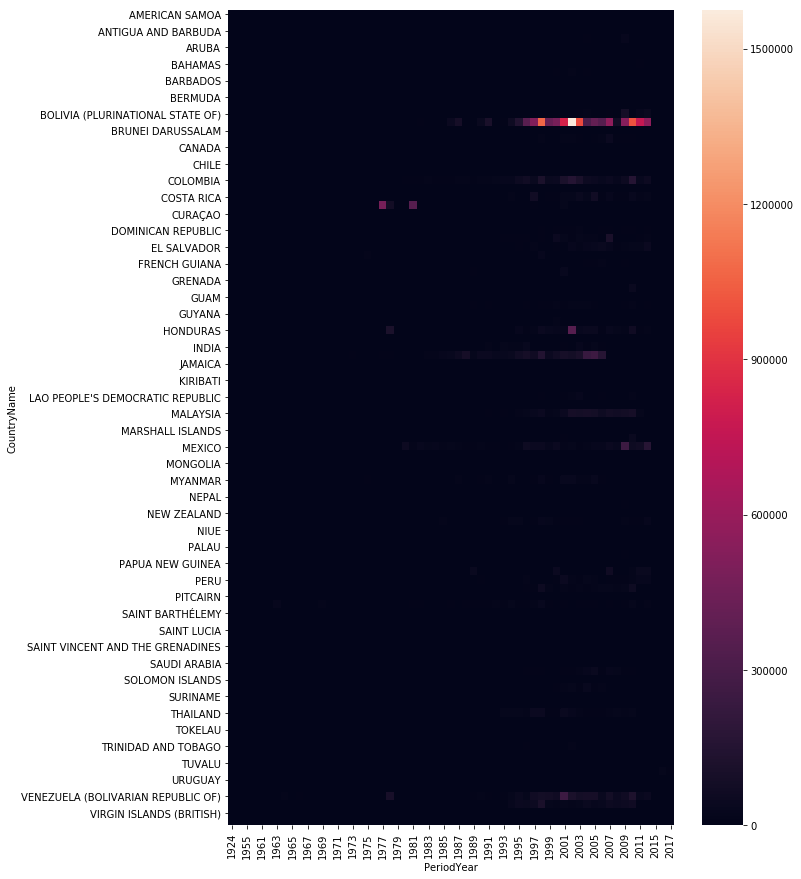

In [12]:
plt.figure(figsize=(10,15))
sns.heatmap(pivoted)

In [13]:
pivoted.shape

(98, 59)

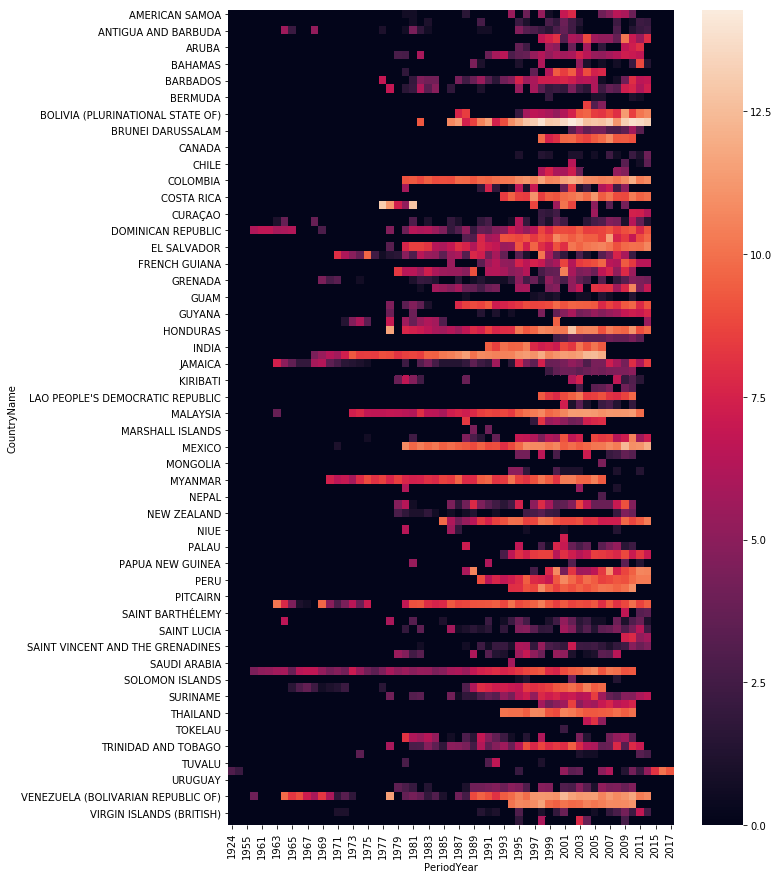

In [38]:
plt.figure(figsize=(10,15))
sns.heatmap(np.log(pivoted+1))

In [40]:
scaler = StandardScaler()

In [42]:
piv_scaled = scaler.fit_transform(pivoted)

In [43]:
piv_scaled = pd.DataFrame(piv_scaled, index=pivoted.index, columns=pivoted.columns)

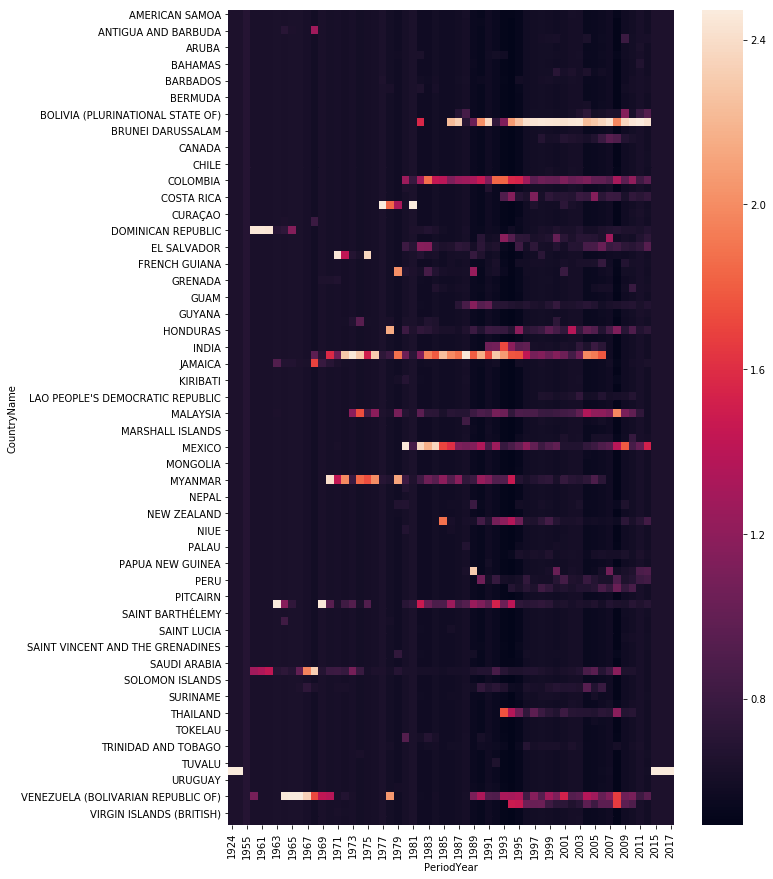

In [48]:
plt.figure(figsize=(10,15))
sns.heatmap(np.log(piv_scaled+2))